# Plant Disease Detection Using Convolutional Neural Networks

This project aims to develop a Convolutional Neural Network (CNN) model to detect plant diseases from images. The dataset used is the PlantVillage dataset, which contains images of healthy and diseased plant leaves. The project involves the following steps:

1. Data Loading and Preprocessing: Load the dataset, resize, and rescale the images.
2. Model Architecture: Build a CNN model using TensorFlow's Sequential API.
3. Model Training: Train the model on the training dataset and validate it on the validation dataset.
4. Model Evaluation: Evaluate the model's performance on the test dataset.
5. Visualization: Plot the training and validation accuracy and loss over epochs.
6. Predictions: Make predictions on the test dataset and visualize the results.
7. Model Saving: Save the trained model for future use.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

1. **Data Loading and Preprocessing**: Load the dataset, resize, and rescale the images.

In [2]:
# Constants Variables
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


2025-01-24 22:48:05.488261: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-01-24 22:48:05.488287: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-01-24 22:48:05.488290: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-01-24 22:48:05.488323: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-24 22:48:05.488337: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# Print the class names
class_names = dataset.class_names

# Get the class names
print("Dataset Classes:")
for i, class_name in enumerate(class_names):
    print(f"{i + 1}. {class_name.replace('_', ' ')}")

Dataset Classes:
1. Potato Early blight
2. Potato Late blight
3. Potato healthy


In [5]:
# Length of the dataset
dataset_length = len(dataset)
print(f"Dataset Length: {dataset_length}")

Dataset Length: 68


2025-01-24 22:48:06.071558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


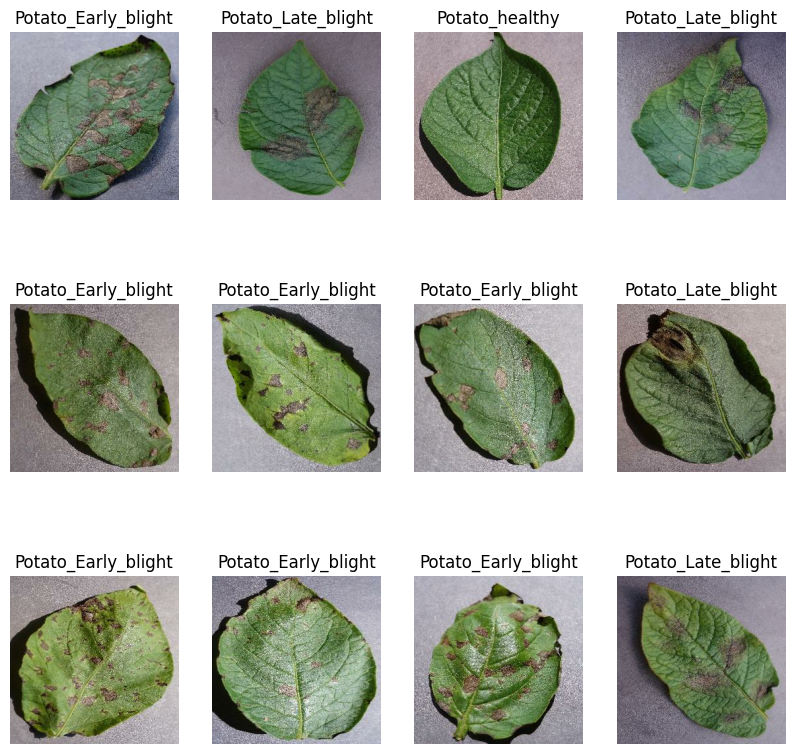

In [6]:
plt.figure(figsize=(10, 10))
for iamge_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(iamge_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
# Train, Validation and Test Split
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    # Verify that split ratios sum to 1
    assert (train_split + test_split + val_split) == 1
    
    # Get the total size of the dataset
    ds_size = len(ds)
    
    # Shuffle the dataset if specified
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    # Calculate sizes for train and validation sets
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    # Split dataset into train, validation and test sets
    train_ds = ds.take(train_size)    # Take first train_size elements for training
    val_ds = ds.skip(train_size).take(val_size)    # Skip training data, take val_size elements for validation
    test_ds = ds.skip(train_size).skip(val_size)    # Skip training and validation data for test set
    
    return train_ds, val_ds, test_ds

In [8]:
# Get the partitions
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# Print the length of the datasets
print("Train Dataset: ", len(train_ds))
print("Validation Dataset: ", len(val_ds))
print("Test Dataset: ", len(test_ds))

Train Dataset:  54
Validation Dataset:  6
Test Dataset:  8


In [9]:
# Train DS Cache, Prefetch and Shuffle
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Validation DS Cache, Prefetch and Shuffle
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Test DS Cache, Prefetch and Shuffle
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [10]:
# Resize and Rescale the images using Sequential API
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [11]:
# Data Augmentation using Sequential API
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

**Model Architecture**: Build a CNN model using TensorFlow's Sequential API.

In [12]:
# Nural Network Architecture

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

# Create the model using Sequential API
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

/opt/anaconda3/envs/metal-env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

**Model Training**: Train the model on the training dataset and validate it on the validation dataset.

In [14]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [15]:
# Train the model using fit
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
)

Epoch 1/50


/opt/anaconda3/envs/metal-env/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2025-01-24 22:48:07.353904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.4504 - loss: 0.9359 - val_accuracy: 0.6042 - val_loss: 0.8789
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.6109 - loss: 0.8036 - val_accuracy: 0.8333 - val_loss: 0.4547
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8232 - loss: 0.4596 - val_accuracy: 0.9167 - val_loss: 0.3415
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8944 - loss: 0.3318 - val_accuracy: 0.8802 - val_loss: 0.3253
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8838 - loss: 0.2963 - val_accuracy: 0.9427 - val_loss: 0.1751
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9256 - loss: 0.1891 - val_accuracy: 0.9635 - val_loss: 0.0999
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9355 - loss: 0.1718 - val_accuracy: 0.9167 - val_loss: 0.1632
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9452 - loss: 0.1300 - val_accuracy: 0.8854 - val_loss: 0.

**Model Evaluation**: Evaluate the model's performance on the test dataset.

In [16]:
# Print the Score
score = model.evaluate(test_ds)

# Print the History
print("History: ", history.history)

# Print the History Parameters
print("History Parameters: ", history.params)

# Print the History Keys
print("History Keys: ", history.history.keys())

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 1.9775e-04
History:  {'accuracy': [0.5011574029922485, 0.6655092835426331, 0.8333333134651184, 0.8692129850387573, 0.8940972089767456, 0.9207175970077515, 0.9357638955116272, 0.9467592835426331, 0.9450231194496155, 0.9172453880310059, 0.9513888955116272, 0.9664351940155029, 0.9791666865348816, 0.9554398059844971, 0.9600694179534912, 0.9745370149612427, 0.9872685074806213, 0.9890046119689941, 0.9658564925193787, 0.9467592835426331, 0.9751157164573669, 0.9913194179534912, 0.9953703880310059, 0.9971064925193787, 0.9976851940155029, 0.9739583134651184, 0.9803240895271301, 0.9861111044883728, 0.9861111044883728, 0.9849537014961243, 0.9953703880310059, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [0.8915247917175293, 0.7195225358009338, 0.44124799966812134, 0.36737722158432007, 0.2599121630191803, 0.19720295071601868, 0.18059362471103668, 0.13334178924560547, 0.14229562

**Visualization**: Plot the training and validation accuracy and loss over epochs.

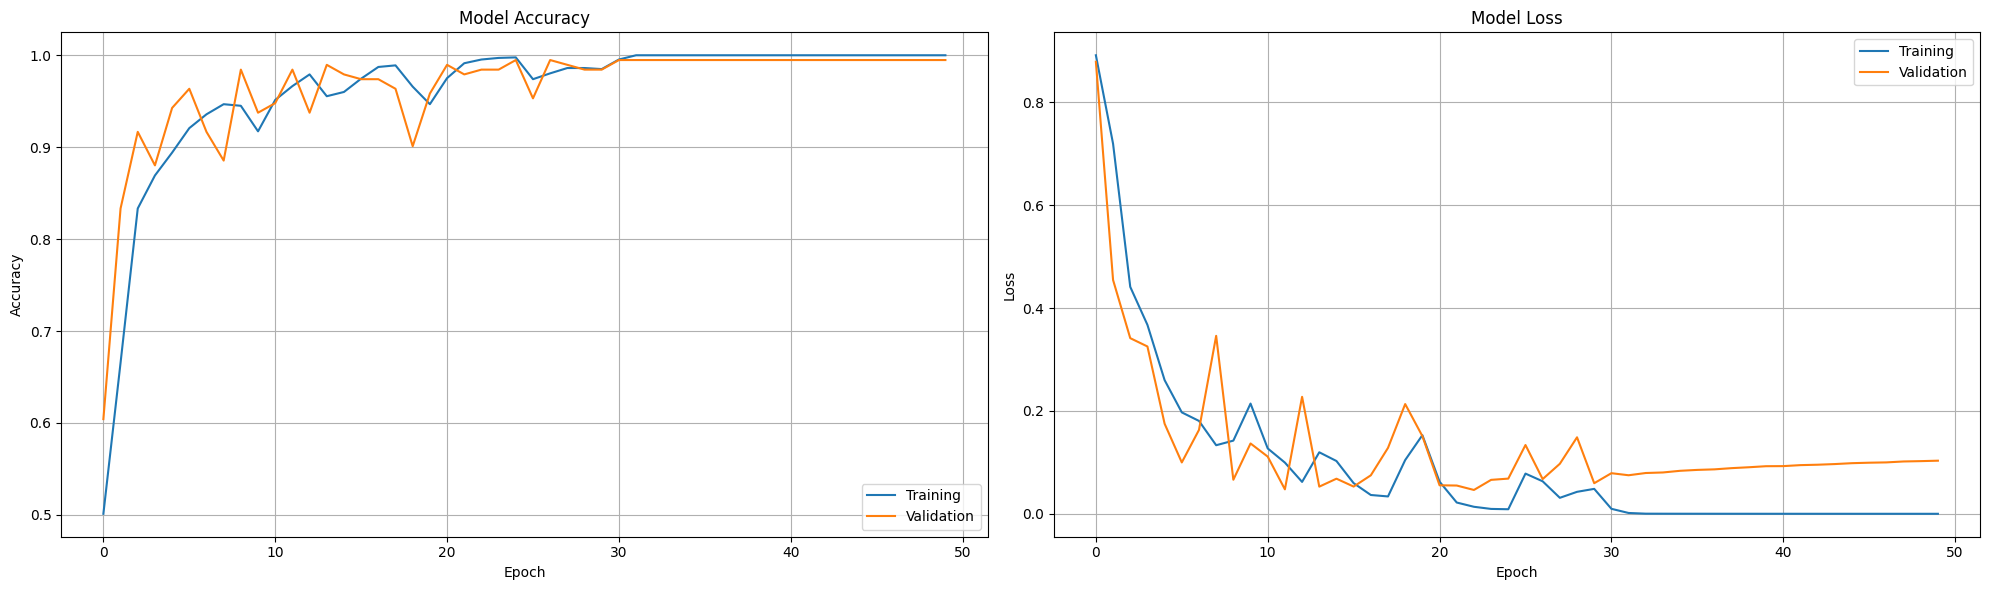

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create figure and axis objects with a single subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'], label='Training')
ax1.plot(history.history['val_accuracy'], label='Validation')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')
ax1.grid(True)

# Plot training & validation loss values
ax2.plot(history.history['loss'], label='Training')
ax2.plot(history.history['val_loss'], label='Validation')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
ax2.grid(True)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


**Predictions**: Make predictions on the test dataset and visualize the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


2025-01-24 22:51:55.943656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


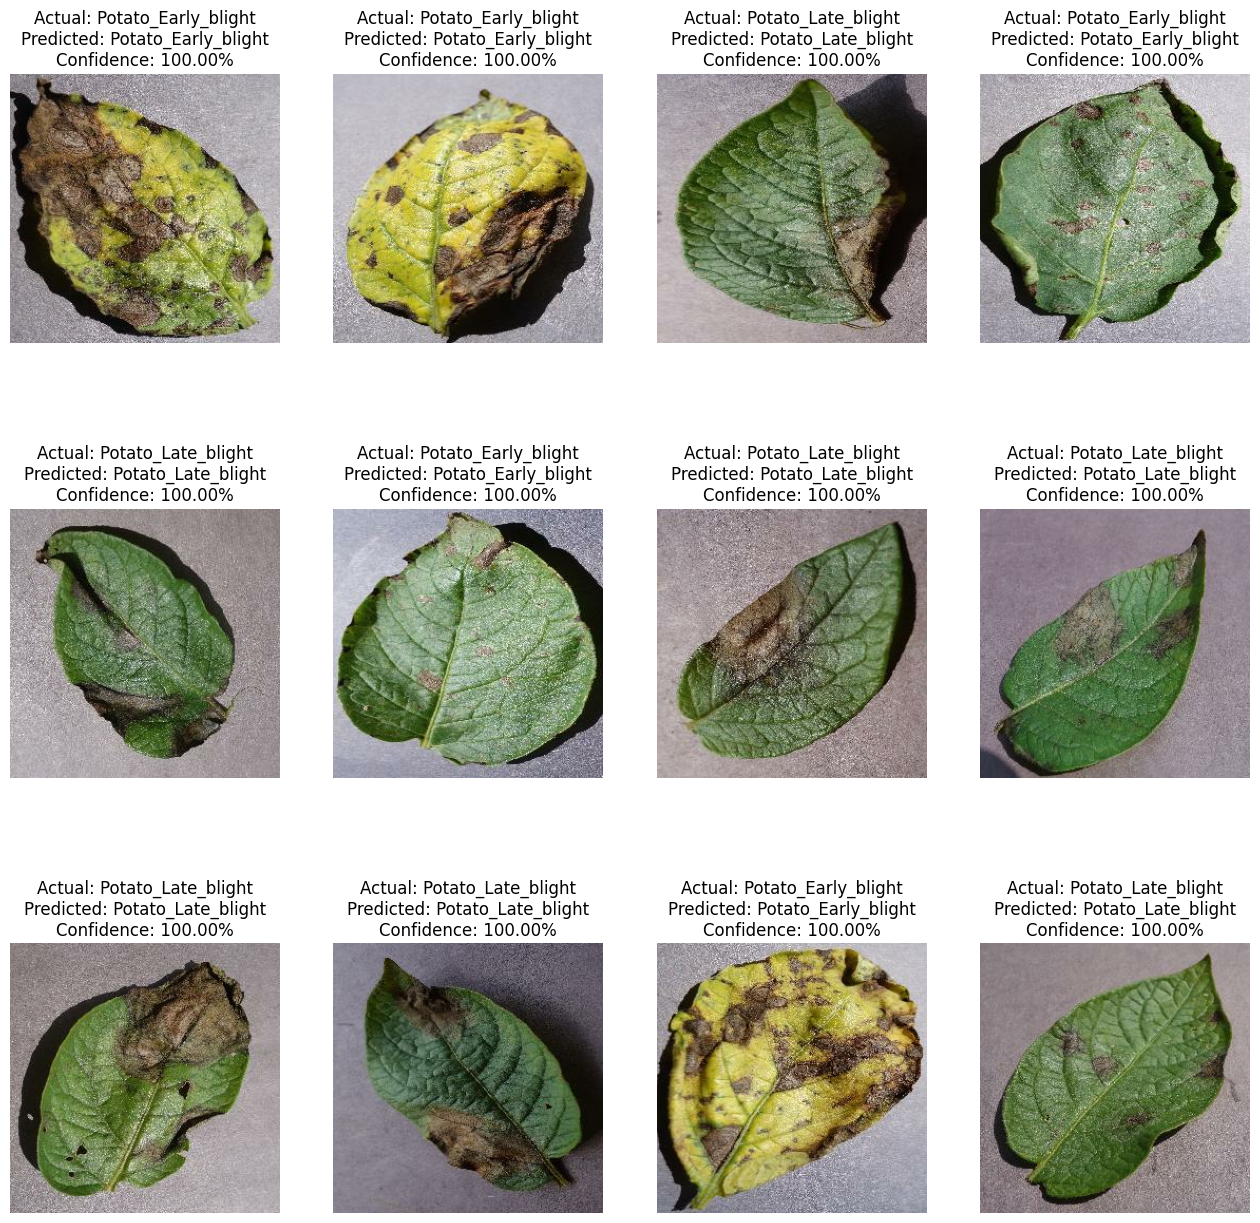

In [20]:
# Predictions using the model
for image_batch, labels_batch in test_ds.take(1):  # Take one batch from test dataset
    ps = model.predict(image_batch)  # Get model predictions for the batch
    images = image_batch.numpy().astype("uint8")  # Convert images to numpy array
    labels = labels_batch.numpy()  # Convert labels to numpy array

    plt.figure(figsize=(16, 16))  # Create a figure with specified size
    for i in range(12):  # Loop through first 12 images
        ax = plt.subplot(3, 4, i + 1)  # Create a 3x4 subplot grid
        plt.imshow(images[i])  # Display the image
        
        # Get prediction confidence
        confidence = ps[i][ps[i].argmax()] * 100
        
        # Create title with actual label, predicted label and confidence
        title = f"Actual: {class_names[labels[i]]}\nPredicted: {class_names[ps[i].argmax()]}\nConfidence: {confidence:.2f}%"
        plt.title(title)  # Show title
        plt.axis("off")  # Hide axes

**Model Saving**: Save the trained model for future use.

In [19]:
# Save the model
model_version = "V0.1"
model_name = "PlantDiseaseDetection"
model.save(f"./models/{model_name}_{model_version}.keras")
